## Overview of the Dataset
Before jumping into the data exploration stage, let's take a moment to get a high-level overview of the dataset. 

In [228]:
#!/usr/bin/python3 -m pip install --upgrade seaborn==0.11
#!/usr/bin/python3 -m pip install --upgrade sklearn

In [231]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [272]:
# Load helper functions from src/utils-*-*.py to run on jupyter-notebook
%run ../src/utils-explore-clean.py

<Figure size 432x288 with 0 Axes>

In [55]:
# Print versions of modules
get_version('numpy')
get_version('pandas')
get_version('seaborn')

numpy version is: 1.17.4
pandas version is: 1.1.3
seaborn version is: 0.11.0


In [56]:
# List of styles available in seaborn
print(style.available)

%matplotlib inline
style.use('seaborn-whitegrid')

['fast', 'seaborn-white', 'seaborn-darkgrid', 'seaborn-colorblind', 'seaborn', 'classic', 'Solarize_Light2', 'seaborn-dark-palette', 'seaborn-talk', 'fivethirtyeight', 'seaborn-whitegrid', 'seaborn-paper', 'tableau-colorblind10', 'grayscale', 'dark_background', '_classic_test', 'seaborn-notebook', 'seaborn-dark', 'seaborn-poster', 'seaborn-pastel', 'seaborn-ticks', 'seaborn-deep', 'ggplot', 'seaborn-muted', 'seaborn-bright', 'bmh']


In [57]:
# Load clean credit card data
cc_clean_df = pd.read_csv('../datasets/crx.data_clean.csv', index_col=[0])
cc_clean_df.head(5)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefaulter,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [58]:
# high-level overview of the dataset
print(cc_clean_df.shape)
print(cc_clean_df.info())

(690, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefaulter  690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 91.6+ KB
None


There are 5 numerical and 11 categorical variables in the dataset. 

In [59]:
# Split combined dataframe into numerical & categorical dataframes
cc_clean_num, cc_clean_cat = split_dataframe_datatypes(cc_clean_df)

In [60]:
display(cc_clean_num.head(5))

,Age,Debt,YearsEmployed,CreditScore,Income
0,30.83,0.000,1.25,1,0
1,58.67,4.460,3.04,6,560
2,24.50,0.500,1.50,0,824
3,27.83,1.540,3.75,5,3
4,20.17,5.625,1.71,0,0


In [61]:
display(cc_clean_cat.head(5))

,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefaulter,Employed,DriversLicense,Citizen,ZipCode,Approved
0,b,u,g,w,v,t,t,f,g,00202,+
1,a,u,g,q,h,t,t,f,g,00043,+
2,a,u,g,q,h,t,f,f,g,00280,+
3,b,u,g,w,v,t,t,t,g,00100,+
4,b,u,g,w,v,t,f,f,s,00120,+


***

## Univariate Analysis

Let's first perform a non-graphical univariate analysis on numerical `cc_clean_num` and categorical `cc_clean_cat` dataframes that we just created by splitting the combined dataframe.

In [62]:
# Univariate Non-Graphical Analysis on Numerical df
cc_clean_num.describe()

,Age,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.000000,690.00000,690.000000
mean,31.558623,4.758725,2.223406,2.40000,1017.385507
std,11.853490,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,0.000000
50%,28.625000,2.750000,1.000000,0.00000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


From the table, it is clear that CreditScore and Income features have outliers in the Q3 (>75%) region. This shows that there are income disparities in the application dataset. Mean of years employed by applicants is around 2 years. This suggests that most applicants are young and are in their early career positions. Mean debt on each applicant is around 4.75 thousand dollars. 

In [63]:
# Univariate Non-Graphical Analysis on categorical df
cc_clean_cat.describe()

,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefaulter,Employed,DriversLicense,Citizen,ZipCode,Approved
count,690,690,690,690,690,690,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,171,2
top,b,u,g,c,v,t,f,f,g,00000,-
freq,480,525,525,146,408,361,395,374,625,132,383


Firstly, the count of each feature/column are 690, which match the initial no. of entries in the dataframe. No. of unique variables in each feature/column differ quite a lot with 2 being the most common unique varible count. Having a percent column would provide a greater understanding about the the values in each column that show more occurances. 

In [64]:
temp_df = cc_clean_cat.describe().T
temp_df['%freq'] = temp_df['freq'] / temp_df['count']
temp_df

,count,unique,top,freq,%freq
Gender,690,2,b,480,0.695652
Married,690,3,u,525,0.76087
BankCustomer,690,3,g,525,0.76087
EducationLevel,690,14,c,146,0.211594
Ethnicity,690,9,v,408,0.591304
PriorDefaulter,690,2,t,361,0.523188
Employed,690,2,f,395,0.572464
DriversLicense,690,2,f,374,0.542029
Citizen,690,3,g,625,0.905797
ZipCode,690,171,00000,132,0.191304


The rejection rate is ~56%. Looks like, on an average, there are more no. of credit card applications that were rejected. 

***

Basic graphical visualization tools for single variable or univariate analysis are:

`Bar Chart` - Nominal and small Ordinal Categorical Data

`Line Chart`- Ordinal Categorical and Interval Data

`Area Chart`- Ordinal Categorical and Interval Data

`Histogram` - Interval Data

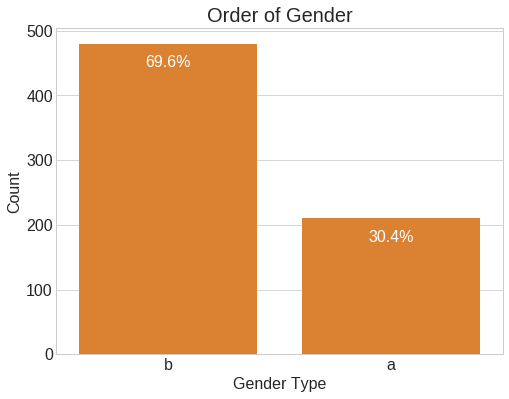

In [235]:
plot_uv_bar(cc_clean_cat, 'Gender', 1)

**Observation**: Above bar chart clearly shows that Gender Type **b** has more applications for a credit card ~ 70% of application

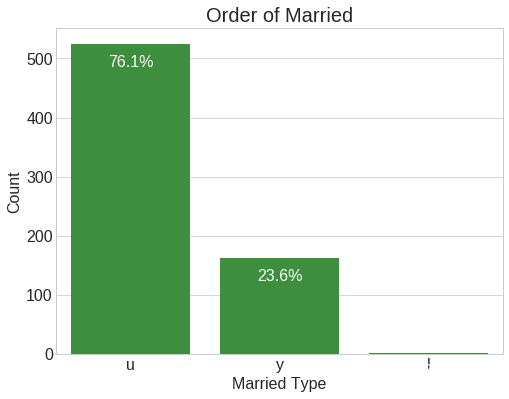

In [236]:
plot_uv_bar(cc_clean_cat, 'Married', 2)

**Observation**: 76.1% of applicants are **u** type, followed by **y** and **i**.

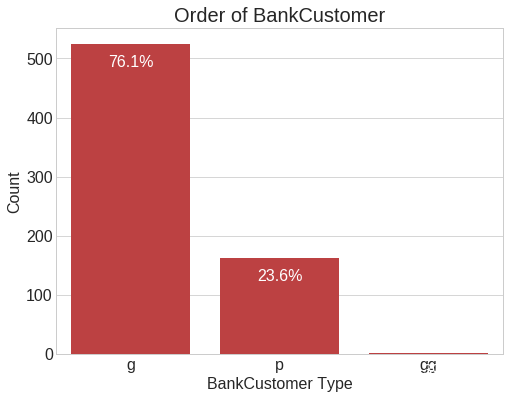

In [237]:
plot_uv_bar(cc_clean_df, 'BankCustomer', 3)

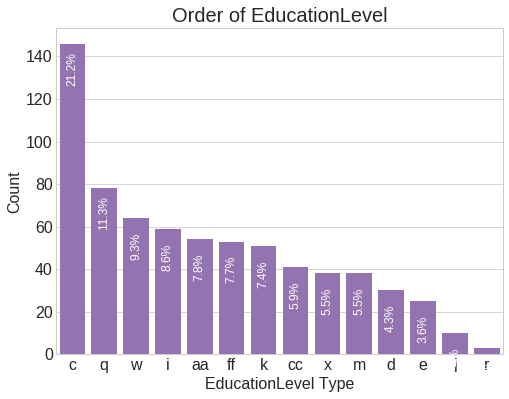

In [238]:
plot_uv_bar(cc_clean_df, 'EducationLevel', 4)

**Observation**: Education Level of type 'c' are dominating the applications, followed by q, w, i, aa ..so on.

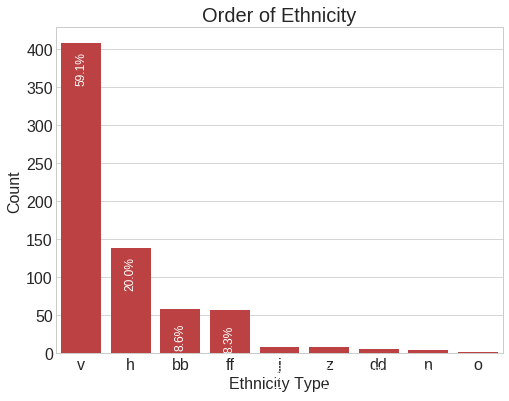

In [69]:
plot_uv_bar(cc_clean_cat, 'Ethnicity', 3)

**Observation**: Looks like ~60% of applicants belong to ethnic group 'v'.

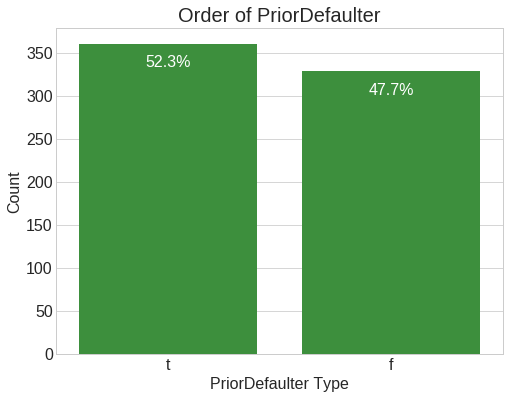

In [70]:
plot_uv_bar(cc_clean_cat, 'PriorDefaulter', 2)

**Observation**: This dataset has close to 50% of applicants who were previous defaulters.

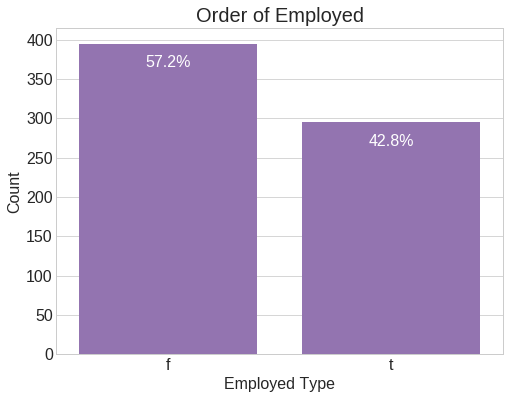

In [71]:
plot_uv_bar(cc_clean_cat, 'Employed', 4)

**Observation**: Employment aspect of applicants is almost equally distributed, which means, close to 50% of applications were from applicants who do not have a job. 

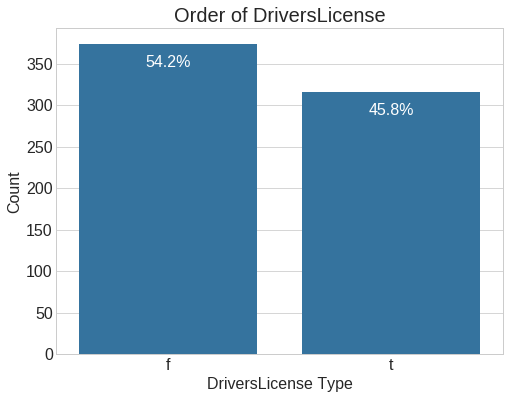

In [72]:
plot_uv_bar(cc_clean_cat, 'DriversLicense', 0)

**Observation**: Almost half of applicant's does not have a drivers license

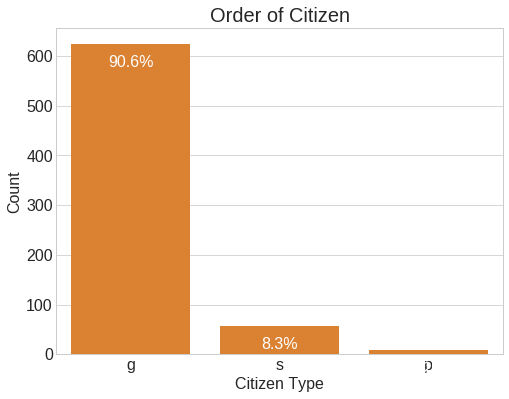

In [73]:
plot_uv_bar(cc_clean_cat, 'Citizen', 1)

**Observation**: Looks like applications are made mostly by Citizen type g.

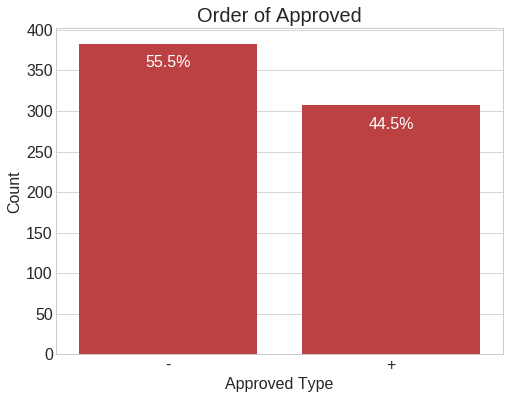

In [74]:
plot_uv_bar(cc_clean_cat, 'Approved', 3)

**Observation**: More than half the credit card applications are rejected. There might be several factors for rejection. Identifying some or all factors will give an applicant a headstart for his new application.

***

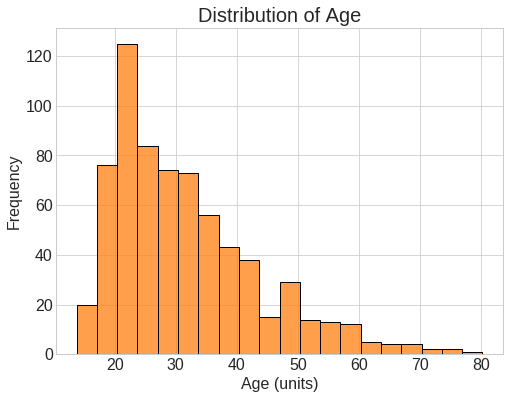

In [247]:
plot_uv_hist(cc_clean_num, "Age", 20, False, 1)

**Observation**: Age of the applicants is rightskewed, unimodal and skewed towards right. 

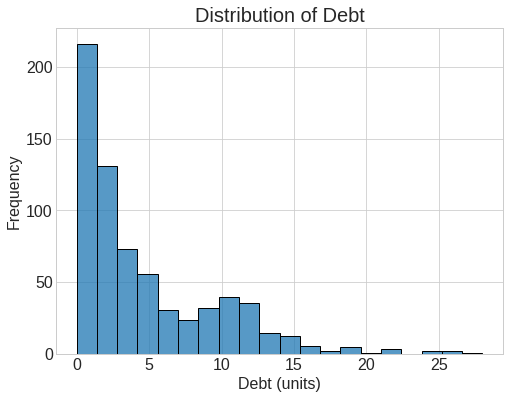

In [248]:
plot_uv_hist(cc_clean_num, "Debt")

**Observation**: Debt of applicants right skewed, bimodal with two peaks one at 1 and other at 11.

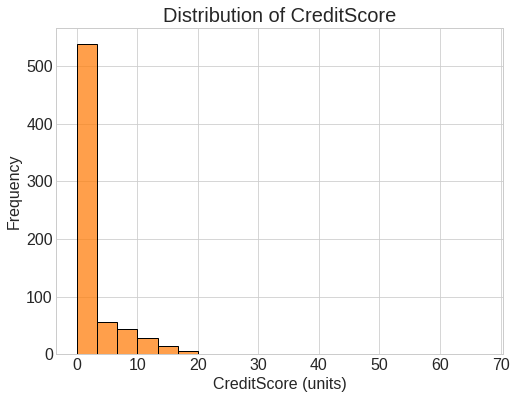

In [250]:
plot_uv_hist(cc_clean_num, 'CreditScore', 20, False, 1)

**Observation**: CreditScore is on the lower end for most of the applications. 

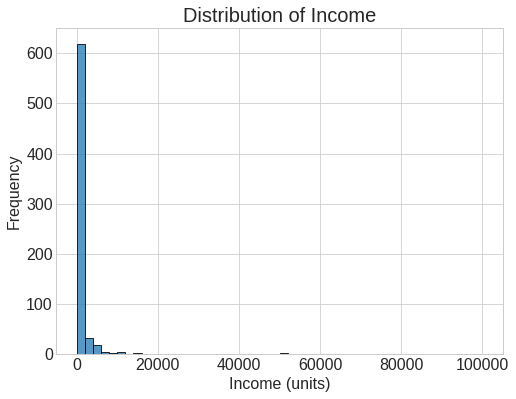

In [206]:
plot_uv_hist(cc_clean_num, 'Income', 50)

**Observations**: 
- Income of applicants is heavily skewed to right. 
- It makes sense. People with lower incomes will mostly need the credit card to pay their monthly upfront costs.
- Most of applicants fall in the category with a monthly income < 10k.

***

## Bivariate Analysis

Above, we performed univarate analysis on the credit card dataset. To understand the relationship between two attributes in the dataset, a bivariate analysis is performed using:

According to seaborn documentation,


1. Categorical **scatterplots**
    - stripplot() (with kind="strip"; the default)
    - swarmplot() (with kind="swarm")


2. Categorical **distribution** plots:
    - boxplot() (with kind="box")
    - violinplot() (with kind="violin")
    - boxenplot() (with kind="boxen")


3. Categorical **estimate** plots:
    - pointplot() (with kind="point")
    - barplot() (with kind="bar")
    - countplot() (with kind="count")

We should not forgot the fact that the bivariate analysis is performed to identify the relationship between a feature and resulting variable. In this dataset, we explore the relationship between different features (Continuous and Categorical) against `Approved` (categorical) feature. 

### Credit Card Approval Vs Age:
Here, we are going to plot the same data on three different charts `swarm`, `box/violin`, and `bar`. The main reason to do so is to analyze how categorical scatters, distributions and estimate plots differ. Further, to identify outlier in the data if any.

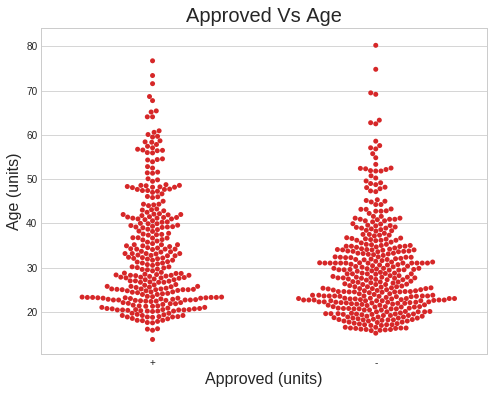

In [265]:
plot_bv_swarm(cc_clean_df, 'Approved', 'Age', 3)

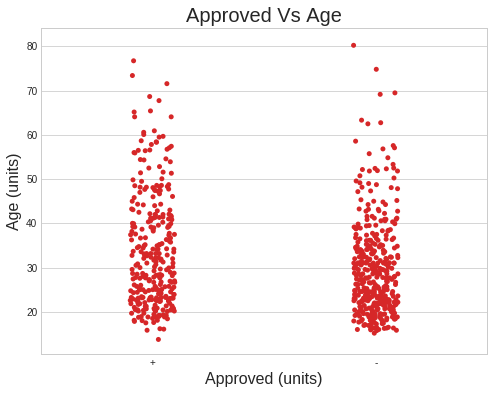

In [266]:
plot_bv_strip(cc_clean_df, 'Approved', 'Age', 3)

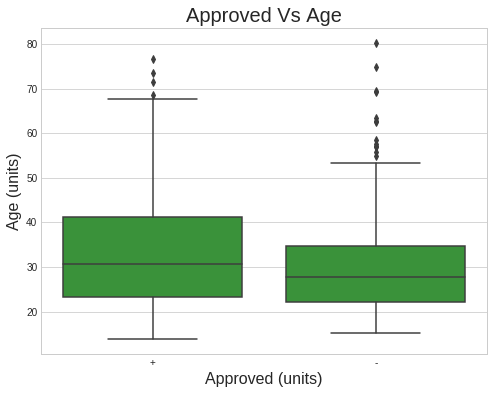

In [275]:
plot_bv_box(cc_clean_df, 'Approved', 'Age',False, 2)

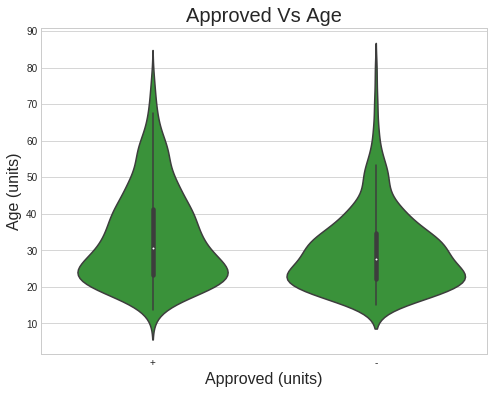

In [273]:
plot_bv_violin(cc_clean_df, 'Approved', 'Age', 2)

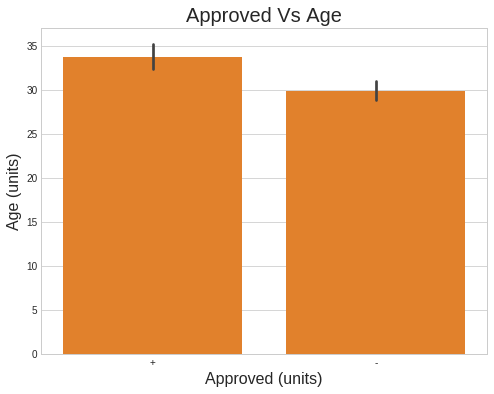

In [276]:
plot_bv_bar(cc_clean_df, 'Approved', 'Age',1)

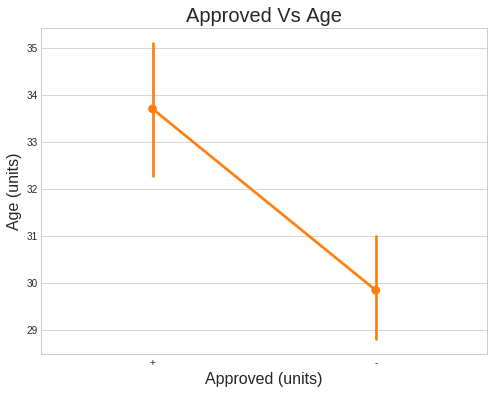

In [277]:
plot_bv_point(cc_clean_df, 'Approved', 'Age',1)

**Observations:**
1. Bar plot provides us with very clean information on mean value of Age of both approved and rejected applications. Here the mean age of approved applications is 34 and that of rejected applications is a a bit lower, at 29.
2. Box plot gives us a more statistical overview on the features. Here, the median age of approved and rejected applications can be seen as 31 and 29 respectively. Interestingly, more valuable information about outliers is displayed in box plot. 
3. Violin and Swarm plots also provide with similar information. Use of any plot solely depends on the project one is working on and details one is interested in. 
4. I personally prefer Swarm plot for these kind of analysis. As it provides with almost all the details I generally look for. 

### Credit Card Approval Vs Debt:
Here, we are looking at who previous debt is related to credit card approval/rejection.

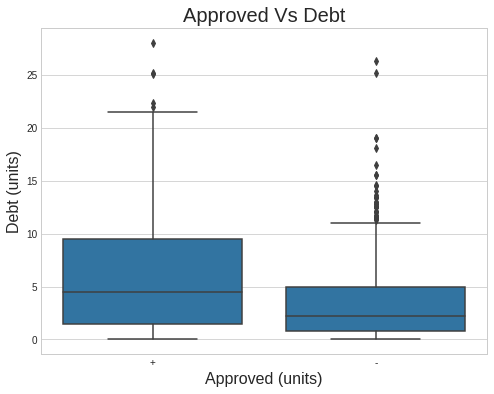

In [100]:
plot_feature_bivarbox(cc_clean_df, 'Approved', 'Debt')

Interestingly, median debt of approved applications (5k) is higher than the rejected counterparts (3k). We can also see the many outliers in this case. 

###  Credit Card Approval Vs YearsEmployed
How does the approval change with employment?

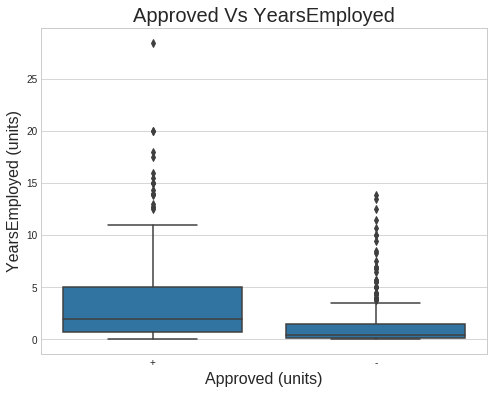

In [104]:
plot_feature_bivarbox(cc_clean_df, 'Approved', 'YearsEmployed')

Applicants who are employed for more than 1 years had more chances of approval. Whereas, the median years of employment of rejected candidates is lower than 1 years. Outliers are also present here and need to be addressed. 

###  Credit Card Approval Vs CreditScore
How does the approval change with the CreditScore of applicant?

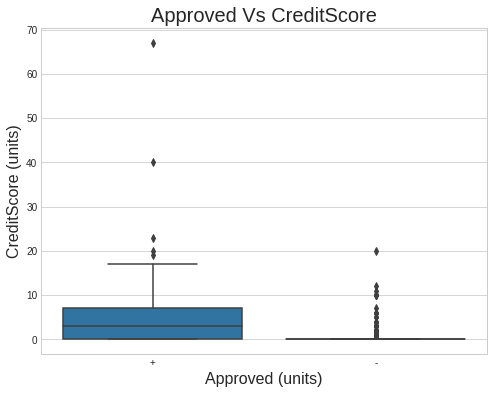

In [106]:
plot_feature_bivarbox(cc_clean_df, 'Approved', 'CreditScore')

Looks like the mean credit score of rejected applicants is almost close to 0. 

###  Credit Card Approval Vs Income
Will the approval change with the Income of applicant?

/home/naneen/.local/lib/python3.8/site-packages/seaborn/categorical.py:441: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  artist_dict = ax.boxplot(box_data,


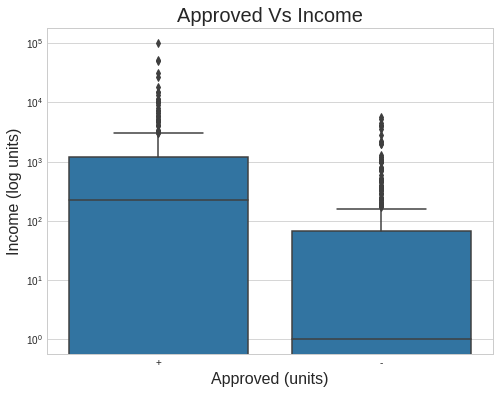

In [115]:
plot_feature_bivarbox(cc_clean_df, 'Approved', 'Income', True)

It is clear from alove plot that median income of rejected applicants is nearly 0.

In this bivariate analysis on Continous features, `Debt`, `YearsEmployed`, `CreditScore` and `Income` can be good indicators on credit card `Approval`.

### Credit Card Approval Vs Gender of applicant
Is there a gender bias that exists during credit card approval?

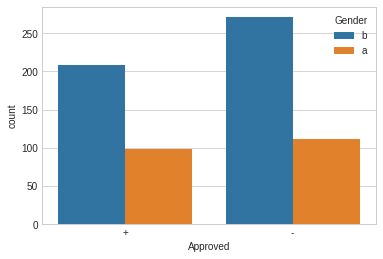

In [139]:
sns.countplot(data=cc_clean_df, x='Approved', hue='Gender')

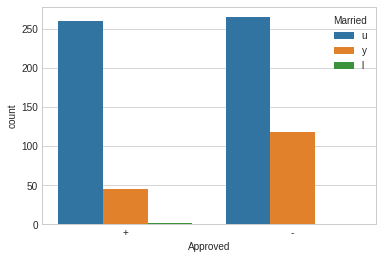

In [140]:
sns.countplot(data=cc_clean_df, x='Approved', hue='Married')

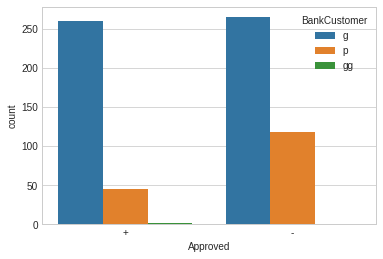

In [141]:
sns.countplot(data=cc_clean_df, x='Approved', hue='BankCustomer')

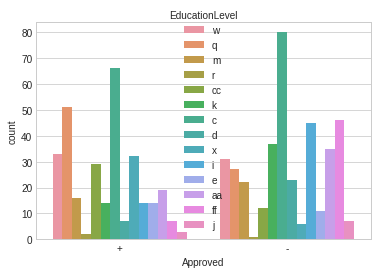

In [143]:
sns.countplot(data=cc_clean_df, x='Approved', hue='EducationLevel')

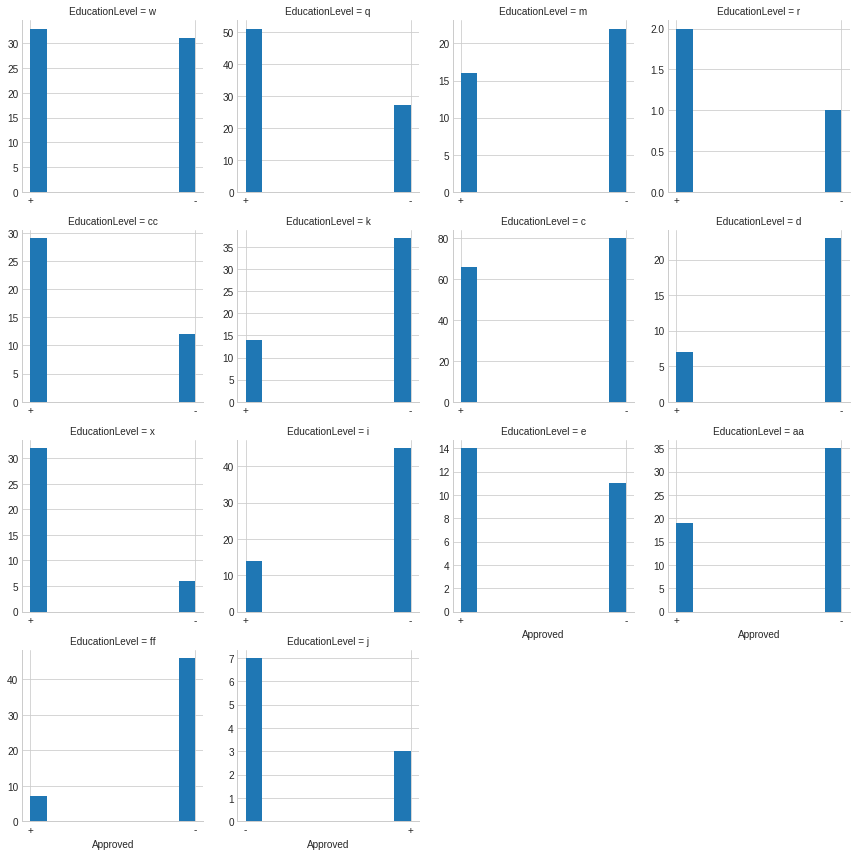

In [210]:
plot_bv_facet(cc_clean_df, 'Approved', 'EducationLevel',4)

Facet grid provides a very detailed overview on the categorical variables against the resultant variables. This inform can be harnessed to build a more detailed ML model.

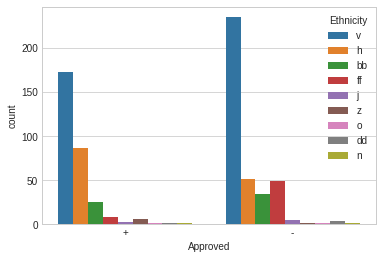

In [211]:
sns.countplot(data=cc_clean_df, x='Approved', hue='Ethnicity')

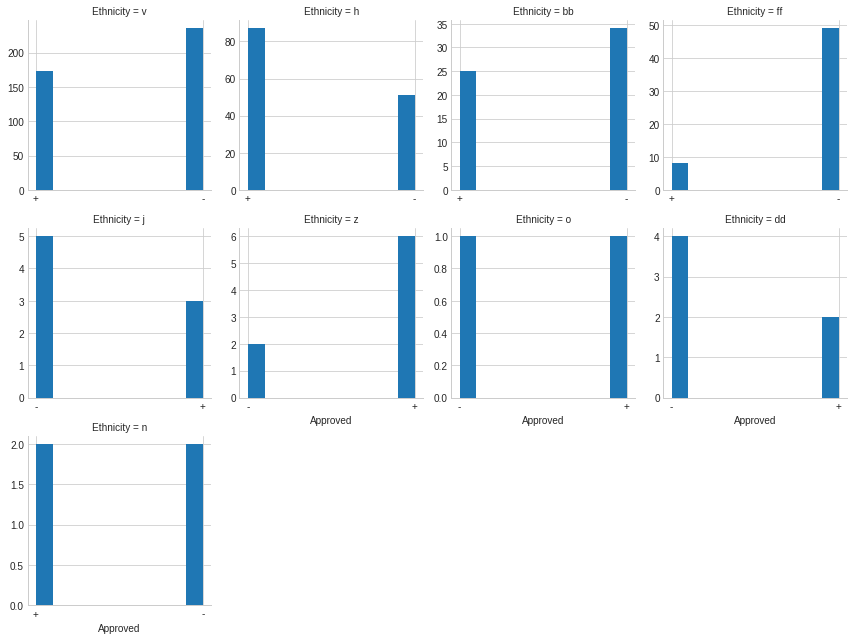

In [212]:
plot_bv_facet(cc_clean_df, 'Approved', 'Ethnicity',4)

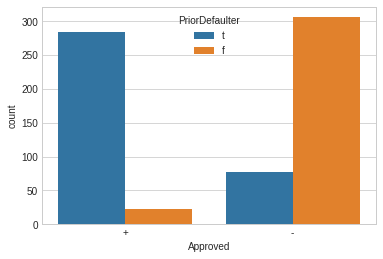

In [213]:
sns.countplot(data=cc_clean_df, x='Approved', hue='PriorDefaulter')

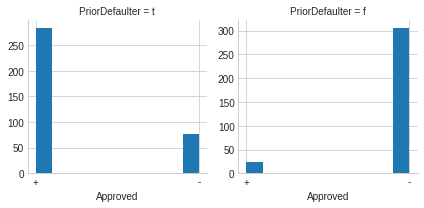

In [215]:
plot_bv_facet(cc_clean_df, 'Approved', 'PriorDefaulter',2)

Up until now, none of the features were observed to influence the apporval rating. But, PriorDefaulter feature seems reversed for approved and rejected applications. So, we should definitely have this feature in our model.  

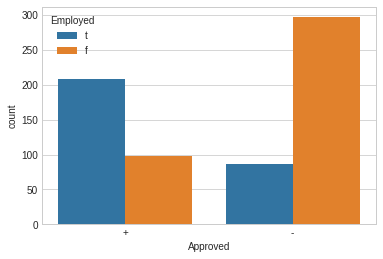

In [216]:
sns.countplot(data=cc_clean_df, x='Approved', hue='Employed')

Same is the case for Employed feature. One thing to remember is that this feature may enter the model two times as there is another feature called YearsEmployed. So, care should be taken while using these two features to build a model.

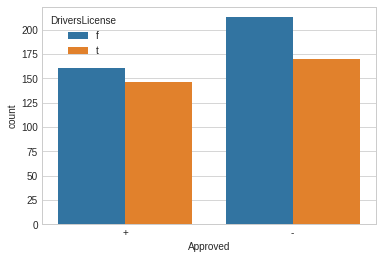

In [217]:
sns.countplot(data=cc_clean_df, x='Approved', hue='DriversLicense')

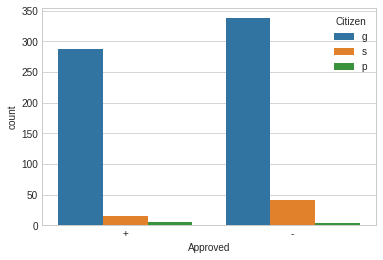

In [218]:
sns.countplot(data=cc_clean_df, x='Approved', hue='Citizen')

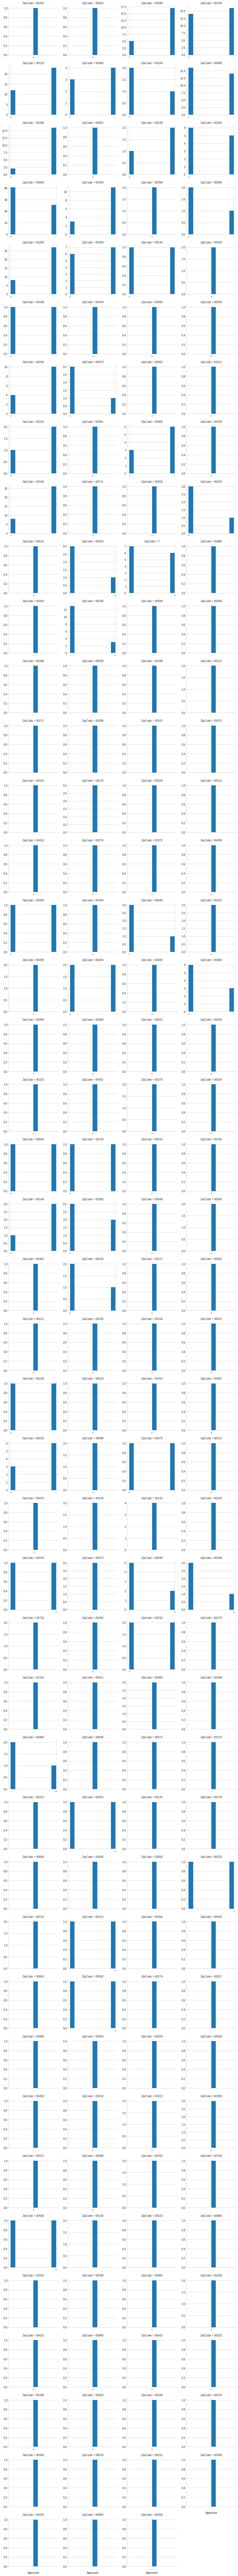

In [222]:
plot_bv_facet(cc_clean_df, 'Approved', 'ZipCode',4)

It is difficult to interpret any relationship between zipcode and credit card approval as of now. We will address this feature, if needed during Feature Engineering.

***

### Multivariate Analysis

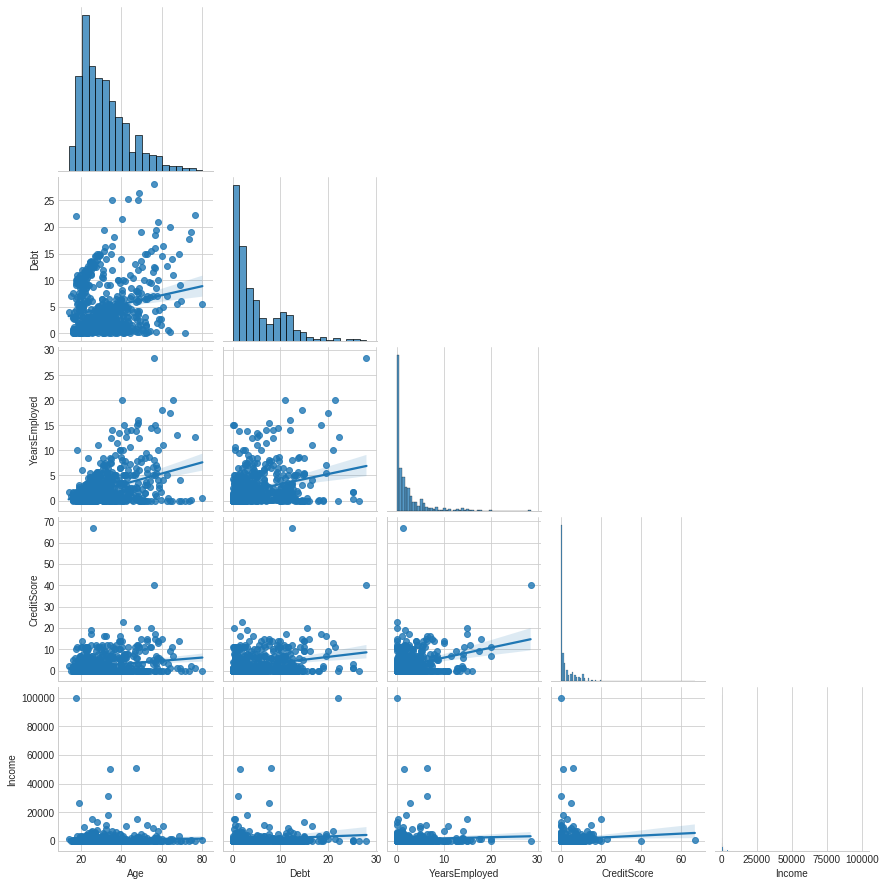

In [223]:
sns.pairplot(cc_clean_num, kind='reg', corner=True);

**Observations:** 
1. Pairplot with regression line gives us an idea about the relationship between two numerical variables.
2. As a very first observation, histograms of all attributes are heavily skewed towards right. To detail them individually:
    - Credit card applications are placed mostly by younger people who are in the age range 20-40.
    - Debt of applicants is small and shouldn't be a worrying factor. 
    - Credit Card applications are mostly made by applicants who are in early stages of their professional careers.
    - Credit Score for most of the applicants is on the lower side. 
    - Ofcourse, income too is on the lower side for most of the applications. 
3. Debt of an applicant is observed to increase with age, which is a worrying trend in concerning credit card applications. 
4. Years Employed scales linearly with CreditScore and Income but with different slopes.

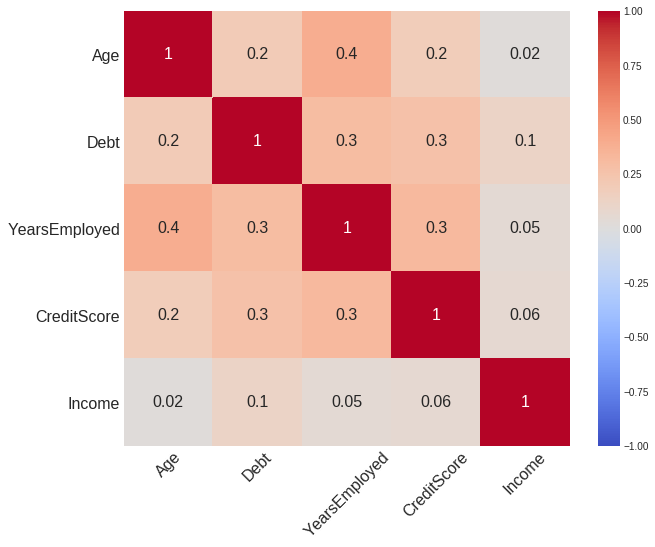

In [224]:
plot_feature_mulvarcorr(cc_clean_df)